**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Dataset**

In [ ]:
df = pd.read_csv("penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


**Preprocessing**

In [ ]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(), inplace = True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(), inplace = True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace = True)
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [ ]:
df = df[df["sex"] != "."]

In [ ]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])

<ipython-input-156-ee483feb4eb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = le.fit_transform(df["sex"])


In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,0


In [ ]:
df["sex"].value_counts()

sex
1    169
0    165
Name: count, dtype: int64

**K-Means**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[238419815.19703597,
 80729066.17620279,
 51329884.14549406,
 28448731.25084861,
 16071807.52843105,
 10873564.27889305,
 8145351.165593263,
 5897580.971526895,
 4715315.590544278,
 3758267.846019501]

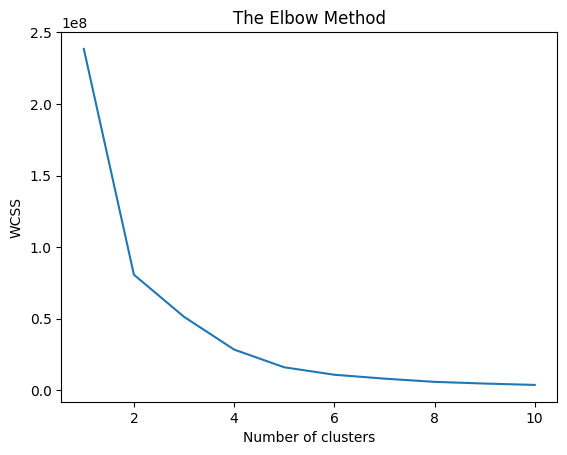

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Because from the picture above it can be seen that the number of clusters 5 and so on does not experience a significant change in WCSS reduction, the optimal number of clusters is 5.

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([3, 3, 0, 0, 3, 0, 1, 4, 0, 3, 1, 3, 0, 1, 0, 3, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 3,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3,
       1, 0, 3, 0, 3, 0, 3, 3, 1, 0, 1, 3, 3, 0, 0, 3, 1, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 2, 3, 1, 2, 1, 3, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

**Hierarchy**

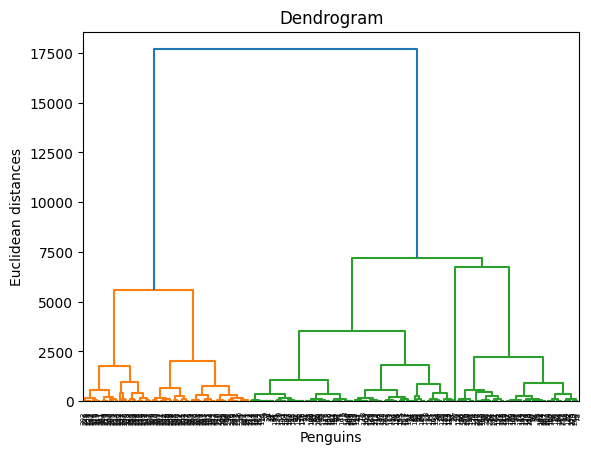

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Penguins')
plt.ylabel('Euclidean distances')
plt.show()

Because based on the image above the longest vertical line that does not touch the horizontal line on any side is blue, the optimal number of clusters for this algorithm is 2.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,